<a href="https://colab.research.google.com/github/aka-gera/Data_Classification/blob/main/simple_loan_classification_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLASSIFIER**

*This algorithm will identify the optimal classification machine learning model for a given dataset.*

This dataset is provided by: https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset

In [1]:
data_dir = f'sujithmandala/simple-loan-classification-dataset'

# Import Dataset

In [2]:
! pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pwd
%cd /content

/content
/content


In [5]:
! mkdir ~/.kaggle

In [6]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download {data_dir}

Dataset URL: https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset
License(s): CC-BY-SA-4.0
  0% 0.00/1.05k [00:00<?, ?B/s]
100% 1.05k/1.05k [00:00<00:00, 1.35MB/s]


In [9]:
import os
file_names = os.listdir()
zip_file =   [file for file in file_names if file.endswith('.zip')]
zip_file

['simple-loan-classification-dataset.zip']

In [10]:
import zipfile

# Open the zip file
with zipfile.ZipFile(zip_file[-1], 'r') as zip_ref:
    zip_ref.extractall()
    unzipped_file_names = zip_ref.namelist()
unzipped_file_names

['loan.csv']

# Import the helper classes

In [11]:
!pwd
%cd /content/drive/MyDrive/ML2023/data-analysis

/content
/content/drive/MyDrive/ML2023/data-analysis


In [12]:
!pip install AutoLogging-ML
!pip install xgboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.1 MB/s eta 0:00:00


In [13]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import math
from plotly.subplots import make_subplots
from AutoLogging_ML import AutoLogger
import seaborn as sns

from aka_data_analysis.aka_plot import aka_plot, aka_correlation_analysis
from aka_data_analysis.aka_learning import aka_learn,aka_clean,aka_filter

aka_plot = aka_plot()
aka_corr_an = aka_correlation_analysis()
aka_clean = aka_clean()
aka_learn = aka_learn()
aka_filter = aka_filter()
aka_corr_an = aka_correlation_analysis()

In [14]:
from aka_data_analysis.aka_nn import aka_nn

In [15]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np
import pandas as pd


# Dataset Information

In [16]:
df = aka_clean.df_get(f'/content/{unzipped_file_names[0]}')

In [17]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [19]:
fig = aka_plot.Plot_histogram_Features(df,[0,1,2,-2,-1] )
if fig is not None:
    fig.show()

In [20]:
aka_plot.plot_pie(df,-1)

In [22]:
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


# Clean Dataset

## Drop Duplicate data

In [23]:
df.drop_duplicates()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


## Swap the target and the last feature

In [25]:
df = aka_clean.swap_features(df,-1)
df.head()

Invalid feature indices or feat_a is equal to feat_b.


,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


### Drop feature(s)


In [26]:
feat =  []
df = aka_clean.drop_feature(df,feat)
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


##  Convert categorical variables into numerical representations

In [27]:
mapping,swapMapping = aka_clean.CleaningVar(df)
df = aka_clean.CleaningDF(df,mapping)
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,0,0,0,0,85000,720,0
1,45,1,1,1,1,62000,680,0
2,28,0,2,2,1,25000,590,1
3,51,1,3,0,0,105000,780,0
4,36,0,4,0,0,75000,710,0


## Balance Dataset

In [28]:
aka_plot.plot_pie(df,-1)

In [ ]:
# df = aka_clean.balance_df(df,'j')
# aka_plot.plot_pie(df, -1)

## Correlation Matrix

In [29]:
aka_corr_an.Plot_Correlation_Matrix(df)

In [30]:

confidence_interval_limit =   [-3,3]             # Define the limits m of the confidence interval [-m, m] and eliminate the outliers'''

correlation_percentage_threshold = .8      # Set the limit of the correlation between the feature to be removed

df_filtered,corr_tmp = aka_learn.filter_drop_corr_df(df,confidence_interval_limit,correlation_percentage_threshold)

print(f'We dropped {df.shape[0]-df_filtered.shape[0]} outliers and remove {df.shape[1]-df_filtered.shape[1]} feature(s)')
print(f'The filtered dataset\'s shape is {df_filtered.shape} ')

We dropped 0 outliers and remove 4 feature(s)
The filtered dataset's shape is (61, 4) 


## Graph the features that are highly correlated


In [31]:
fig = aka_corr_an.Plot_Correlate_Features(df,list(corr_tmp))
if fig is not None:
    fig.show()

### Visualize the distribution of the filtered dataset

In [32]:
aka_plot.Plot_box_Features(df,df_filtered,corr_tmp=range(df_filtered.shape[1]))

# Search for the most effective ML algorithm to learn the dataset

In [33]:
pre_proc = 'X'                             # Choose between 'XY' to standardize both 'X' and 'Y',
                                              #                'X' to standardize only 'X',
                                              #                'Y' to standardize only 'Y',

X_train, X_test, y_train, y_test = aka_learn.Learning_data(df_filtered,pre_proc)

In [46]:
r,model =AutoLogger.train_and_log_classification(X_train,y_train,X_test,y_test,size='large')
y_pred = model.predict(X_test)

In [47]:
model

RandomForestClassifier()

<Axes: xlabel='validation-accuracy', ylabel='model'>

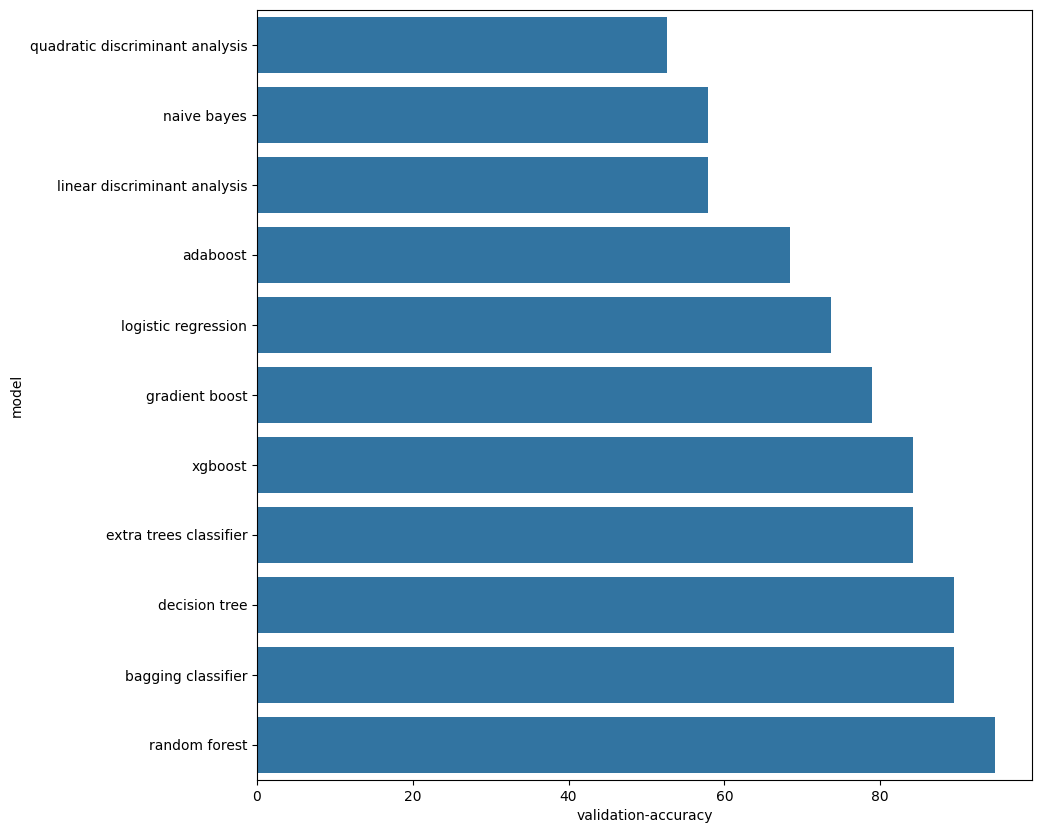

In [48]:
AutoLogger.get_metric_plot_classification(r,'validation','accuracy')

## Confusion Matrix

In [49]:
y_pred_ = aka_clean.swap_map(y_pred,swapMapping)
y_test_ = aka_clean.swap_map(y_test,swapMapping)
Label = [str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]

In [50]:
fig2 =  aka_plot.plot_confusion_matrix(y_test_,y_pred_,Label)
fig2.show()

## Classification Report

In [51]:
fig3 =  aka_plot.plot_classification_report(y_test_,y_pred_,Label)
fig3.show()

## Plot Important Features by Weight

In [52]:
aka_plot.plot_important_features(model,df_filtered)

# Neural Net

## Neural Network Parameters

In [41]:
activation = 'relu'
epoch = 10
num_nodes = [2,4]
dropout_prob = [0.05,0.1]
lr = [0.01,0.1]
batch_size = [2,4]

In [42]:

myNN = aka_nn(X_train, X_test, y_train, y_test,activation)
model,scre =myNN.DNN(epoch,num_nodes,dropout_prob,lr,batch_size)
y_pred = myNN.predict(model)

2 nodes, dropout 0.05, lr 0.01, batch size 2
1/1 [==============================] - 0s 43ms/step - loss: 0.1793 - accuracy: 0.7895
2 nodes, dropout 0.05, lr 0.01, batch size 4
1/1 [==============================] - 0s 36ms/step - loss: 0.2096 - accuracy: 0.6842
2 nodes, dropout 0.05, lr 0.1, batch size 2
1/1 [==============================] - 0s 31ms/step - loss: 0.1807 - accuracy: 0.7895
2 nodes, dropout 0.05, lr 0.1, batch size 4
1/1 [==============================] - 0s 27ms/step - loss: 0.1689 - accuracy: 0.7895
2 nodes, dropout 0.1, lr 0.01, batch size 2
1/1 [==============================] - 0s 33ms/step - loss: 0.3298 - accuracy: 0.6842
2 nodes, dropout 0.1, lr 0.01, batch size 4
1/1 [==============================] - 0s 41ms/step - loss: 0.1714 - accuracy: 0.7895
2 nodes, dropout 0.1, lr 0.1, batch size 2
1/1 [==============================] - 0s 45ms/step - loss: 0.1848 - accuracy: 0.7895
2 nodes, dropout 0.1, lr 0.1, batch size 4
1/1 [==============================] - 0s 30ms

## Confusion Matrix

In [43]:
y_pred_ = aka_clean.swap_map(y_pred,swapMapping)
y_test_ = aka_clean.swap_map(y_test,swapMapping)
Label = [str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]

In [44]:
fig2 =  aka_plot.plot_confusion_matrix(y_test_,y_pred_,Label)
fig2.show()

## Classification Report

In [45]:
fig3 =  aka_plot.plot_classification_report(y_test_,y_pred_,Label)
fig3.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

